# ***q1***



# ***part 1***

In [ ]:
#importing numpy
import numpy as np

importing the dataset from keras inbuilt data set

In [ ]:
from tensorflow import keras
from keras.datasets import mnist

importing the data as seperate training set and testing set as per the nature of the data

In [ ]:
(Xtrain,Ytrain),(Xtest,Ytest) = mnist.load_data()

viewing the shape of the the shape of training set




In [ ]:
Xtrain.shape
#we can see that the training set has 60000 images each of which is of 28*28 pixel configuration

(60000, 28, 28)

viewing few images

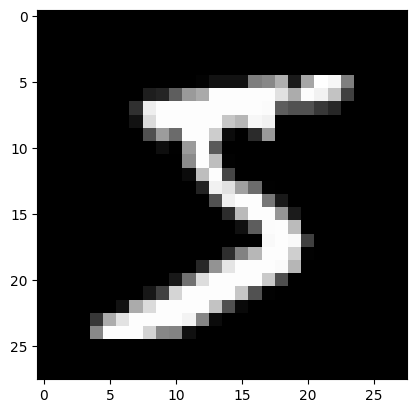

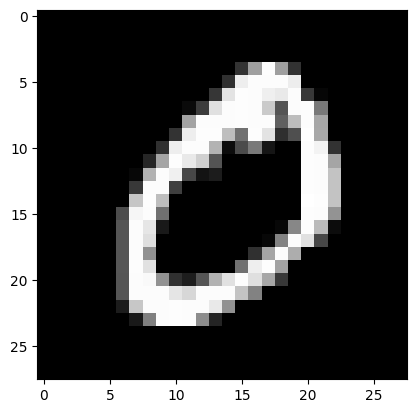

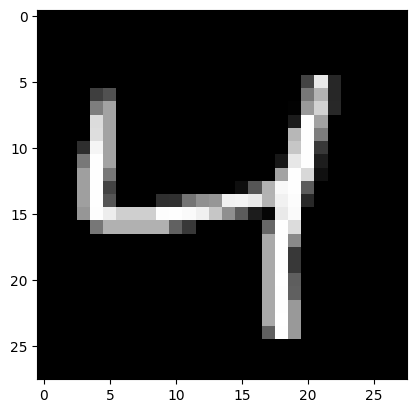

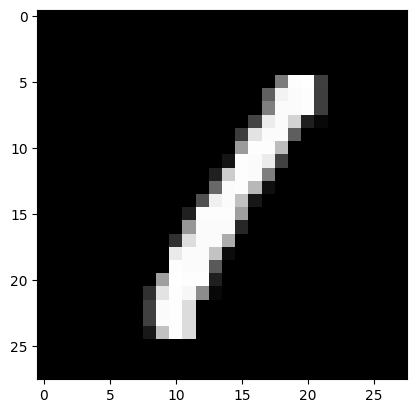

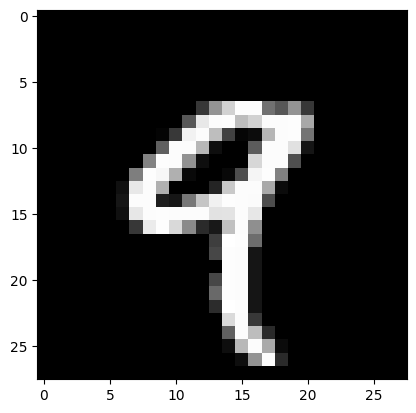

In [ ]:
import matplotlib.pyplot as plt#plotting library
for i in range(5):
  plt.imshow(Xtrain[i],cmap='gray')
  plt.show()

storing the dimensions of the dataset for future reference

In [ ]:
l,m,n=Xtrain.shape
l,m,n

(60000, 28, 28)

we need to flatten the 28*28 matrix into a single list of 28*28=784 elements

In [ ]:
X=np.array([i.flatten() for i in Xtrain])
X.shape

(60000, 784)

here we have a N*D matrix but here we need  D*N matrix as it will produce a covariance matrix of D*D and hence there will be D eigen vector compution(here D<<N).therefore we need to transpose the matrix

In [ ]:
Y=X.T
p,q=Y.shape
p,q

(784, 60000)

centering the data points--calculating average of each row and subtracting it from each value of that row

In [ ]:
avg=np.mean(Y,axis=1)
Y=Y-avg[:,None]

computing the covariance matrix

In [ ]:
C=Y@Y.T
C=C/l
C.shape

(784, 784)

computing the eigen values of the covariance matrix

In [ ]:
from numpy import linalg as LA
eigval,eigvec=LA.eigh(C)
eigval


array([-5.11840885e-11, -3.21462614e-11, -2.37514309e-11, -2.04274211e-11,
       -1.46170586e-11, -9.30980057e-12, -4.94771896e-12, -4.71422762e-12,
       -3.38963232e-12, -2.99208094e-12, -2.93380573e-12, -2.31252538e-12,
       -2.01177808e-12, -1.73644322e-12, -1.28424413e-12, -8.47141067e-13,
       -8.30174414e-13, -5.85270172e-13, -5.11325925e-13, -2.90212231e-16,
       -1.07335504e-16, -6.27454430e-17, -3.69091900e-17, -1.45713742e-17,
       -8.81753496e-18, -2.20270985e-18, -1.50989172e-27, -1.15077056e-27,
       -8.22750103e-28,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.28455011e-28,  4.21497241e-28,  1.03654554e-27,
        1.48985176e-17,  4.71974585e-17,  1.00761846e-16,  4.85172551e-16,
        1.17546053e-15,  

next we have to sort the eigen values and their corresponding eigen vectors in descending order

In [ ]:
indices = np.argsort(eigval)[::-1]
eigval = eigval[indices]
eigvec = eigvec[:,indices]
eigval

array([ 3.32719122e+05,  2.43279884e+05,  2.11503842e+05,  1.84773306e+05,
        1.66924049e+05,  1.47842498e+05,  1.12176333e+05,  9.88727817e+04,
        9.46946708e+04,  8.08084777e+04,  7.23124150e+04,  6.93571454e+04,
        5.88258907e+04,  5.80131171e+04,  5.41228549e+04,  5.08422211e+04,
        4.54118494e+04,  4.37777295e+04,  4.07046620e+04,  3.95191317e+04,
        3.65529266e+04,  3.45146186e+04,  3.26927412e+04,  3.12860644e+04,
        3.02870478e+04,  2.87755987e+04,  2.78588211e+04,  2.69601321e+04,
        2.55327680e+04,  2.36857282e+04,  2.25623859e+04,  2.22213960e+04,
        2.06603275e+04,  2.01106502e+04,  1.95428752e+04,  1.86379815e+04,
        1.73406113e+04,  1.67259660e+04,  1.65055423e+04,  1.61913933e+04,
        1.56593189e+04,  1.52509599e+04,  1.43480897e+04,  1.36525956e+04,
        1.31986443e+04,  1.28602149e+04,  1.24112759e+04,  1.20541151e+04,
        1.16587100e+04,  1.10352905e+04,  1.09373255e+04,  1.07243467e+04,
        1.01476043e+04,  

now our top k eigen vectors represents the top k principal components.let us visualise the top 5 principal components

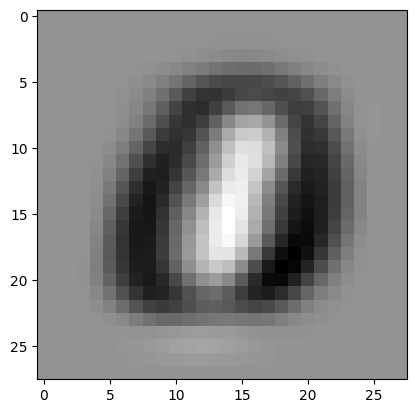

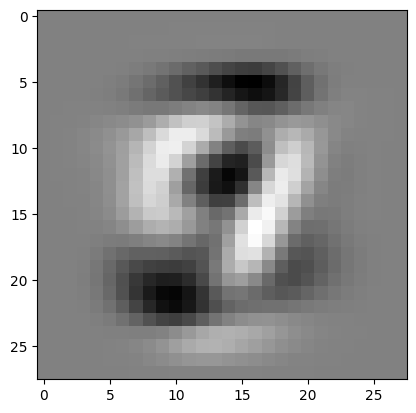

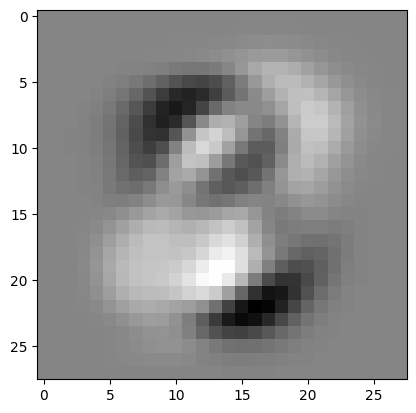

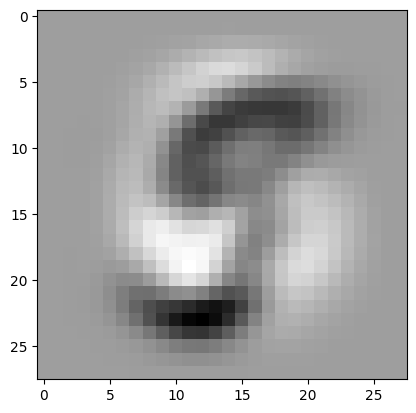

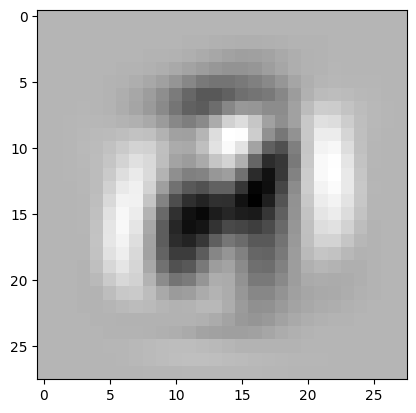

In [ ]:
for i in range(5):
  imi=eigvec[:,i].reshape(28,28)
  plt.imshow(imi,cmap='gray')
  plt.show()

we can see the in the first component maximum variance is observed and it decreases as we proceed to eigen vectors corresponding to lower eigen values

reconstruction

let us 1st reconstruct by all the eigen vectors.that shoul ideally give us the original image

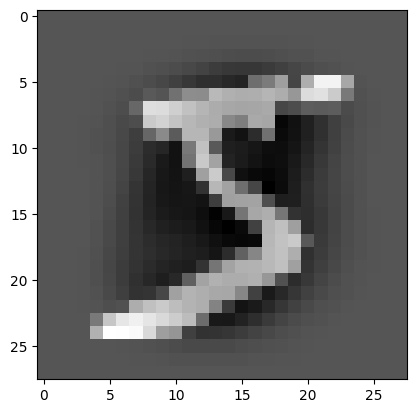

In [ ]:
#reconstructing the 1st image
#coefficients are Wi dot Xi
#computing Wi's
coef=np.zeros((p))
for i in range(p):
  coef[i]=((np.dot(Y[:,0], eigvec[:,i])))
reconstructed=np.zeros(p)
for i in range(p):
  reconstructed+=(coef[i]*eigvec[:,i])
reconstructed=np.reshape(reconstructed,(28,28))
plt.imshow(reconstructed,cmap='gray')
#so we see more or less we get back the 5 which was the original image


let us reconstruct with top 5 eigen vectors

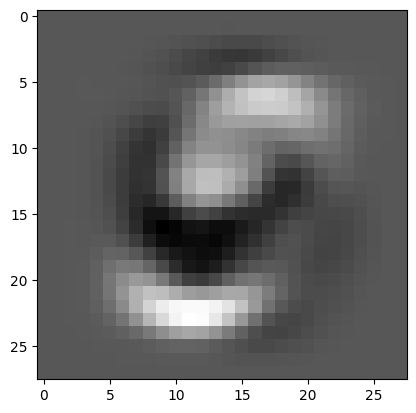

In [ ]:
#reconstructing the 1st image
#coefficients are Wi dot Xi
#computing Wi's
coef=np.zeros((p))
for i in range(5):
  coef[i]=((np.dot(Y[:,0], eigvec[:,i])))
reconstructed=np.zeros(p)
for i in range(5):
  reconstructed+=(coef[i]*eigvec[:,i])
reconstructed=np.reshape(reconstructed,(28,28))
plt.imshow(reconstructed,cmap='gray')
#so we see the image is not well reconstructed

we therefor make a thumb rule that we take upto that eigen values which constitutes 95% of the total eigen value content

In [ ]:
#finding upto which eigen value there is 95% content
sum=np.sum(eigval)

ksum=0
perc=0
i=0

while perc<=0.95:
  ksum+=eigval[i]
  perc=ksum/sum
  i=i+1
print(i)
#we see we have to take upto 154 eigen value


154


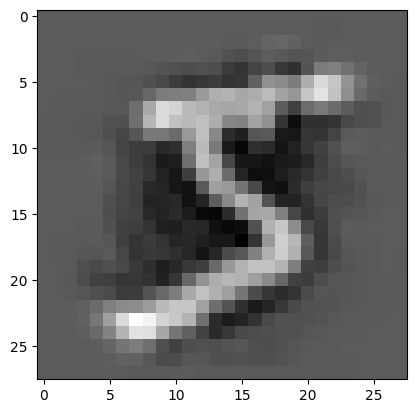

In [ ]:
#reconstructing the 1st image
#coefficients are Wi dot Xi
#computing Wi's
coef=np.zeros((p))
for i in range(154):
  coef[i]=((np.dot(Y[:,0], eigvec[:,i])))
reconstructed=np.zeros(p)
for i in range(153):
  reconstructed+=(coef[i]*eigvec[:,i])
reconstructed=np.reshape(reconstructed,(28,28))
plt.imshow(reconstructed,cmap='gray')
#so we see the image is reasonably well reconstructed


# *conclusion*

we saw that after pca we are able to reasonably recosntruct the the original image using 153 dimension instead of 784 dimension.So this is as reasonable compression and the main goal of pca

# ***kernel pca***

In [ ]:
(Xtrain,Ytrain),(Xtest,Ytest) = mnist.load_data()
X=np.array([i.flatten() for i in Xtest], dtype=np.float64)
X.shape

(10000, 784)

In [ ]:
Y=X.T
Y.shape

(784, 10000)

doing the kernel pca with polynomial kernel

In [ ]:
def kernelpca(X,d):
  degree=d
  Y=X
  #creating the polynomial kernel
  K=(1+Y.T@Y)**d
  #centering the new dataset in higher dimension
  N,N=K.shape
  one_n = np.ones((N,N)) / N
  K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
  #eigen decomposition
  eigval,eigvec=LA.eigh(K)
  indices = np.argsort(eigval)[::-1]
  eigval = eigval[indices]
  eigvec = eigvec[:,indices]
  #normalising the eigen vectors
  eigvec[:,0]=eigvec[:,0]/(np.sqrt(10000*eigval[0]))
  eigvec[:,1]=eigvec[:,1]/(np.sqrt(10000*eigval[1]))
  #picking the 1st to eigen components
  comp1=K@eigvec[:,0]
  comp2=K@eigvec[:,1]
  #plotting the 1st two eigen components
  plt.xlabel('1st component')
  plt.ylabel('2nd component')
  plt.title(f'Polynomial kernel with {degree} degree')
  plt.scatter(comp2,comp1)
  plt.show()

viewing the 1st 2 eigen components for polynomial kernel with different degrees

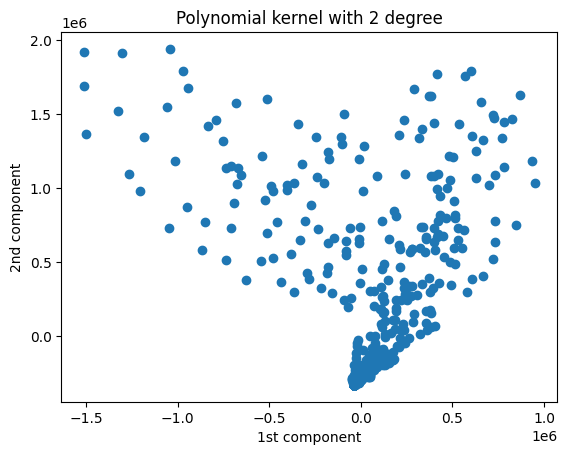

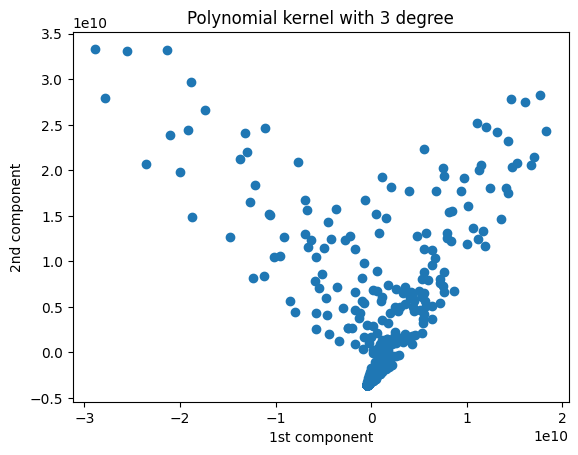

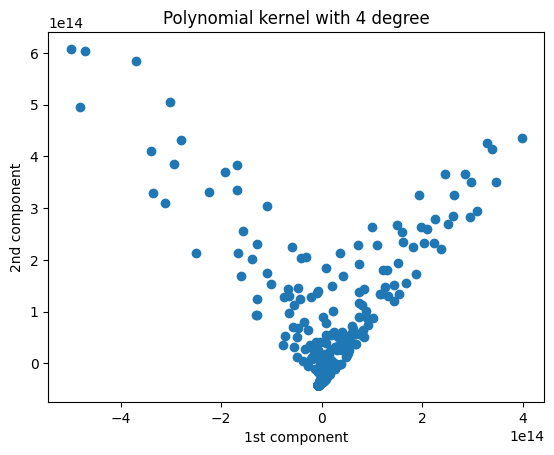

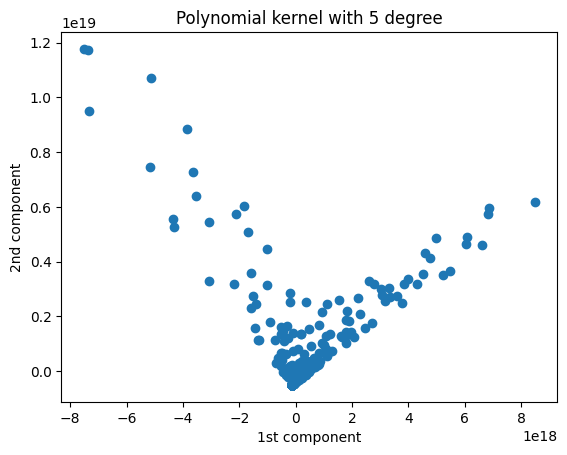

In [ ]:
for i in range(2,6):
  kernelpca(X,i)

doing pca with gaussian kernel

In [ ]:
def kernelpcagaussian(X,s):
  sigma=s
  Y=X
  #creating the gaussian kernel
  Y=np.array(Y)
  D=np.sum(Y**2,axis=1,keepdims=True)+np.sum(Y**2,axis=1)-2*np.dot(Y,Y.T)
  K=np.exp(-D/(2*(s**2)))
  #centering the new dataset in higher dimension
  N,N=K.shape
  one_n = np.ones((N,N)) / N
  K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
  #eigen decomposition
  eigval,eigvec=LA.eigh(K)
  indices = np.argsort(eigval)[::-1]
  eigval = eigval[indices]
  eigvec = eigvec[:,indices]
  #normalising the eigen vectors
  eigvec[:,0]=eigvec[:,0]/(np.sqrt(10000*eigval[0]))
  eigvec[:,1]=eigvec[:,1]/(np.sqrt(10000*eigval[1]))
  #picking the 1st two eigen components
  comp1=K@eigvec[:,0]
  comp2=K@eigvec[:,1]
  #plotting the 1st two eigen components
  plt.xlabel('1st component')
  plt.ylabel('2nd component')
  plt.title(f'gaussian kernel with {sigma} std dev')
  plt.scatter(comp2,comp1)
  plt.show()

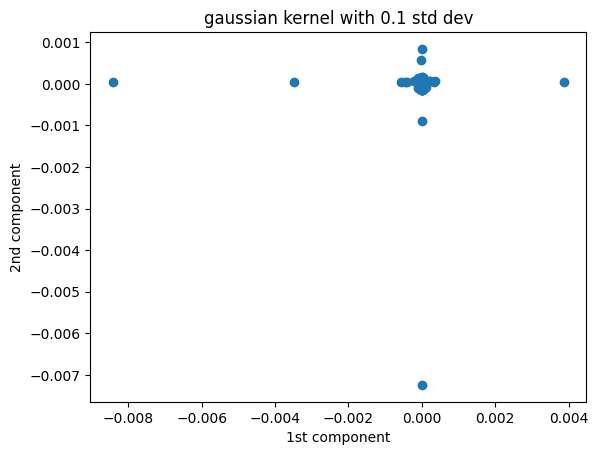

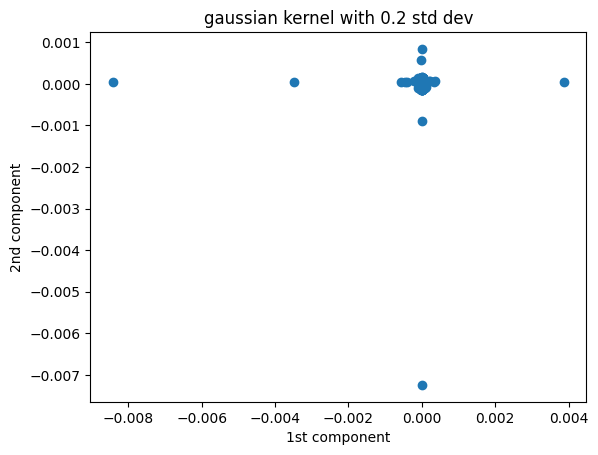

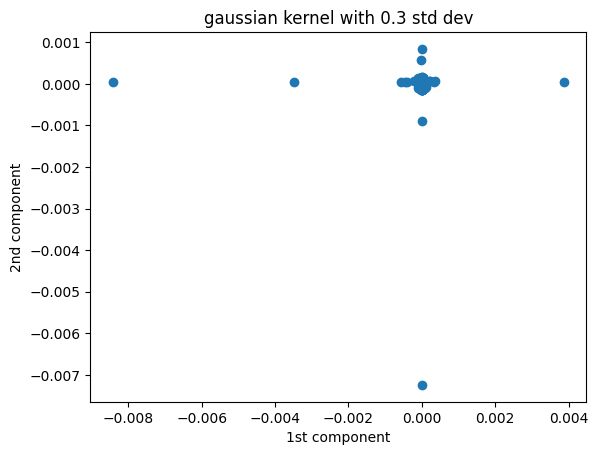

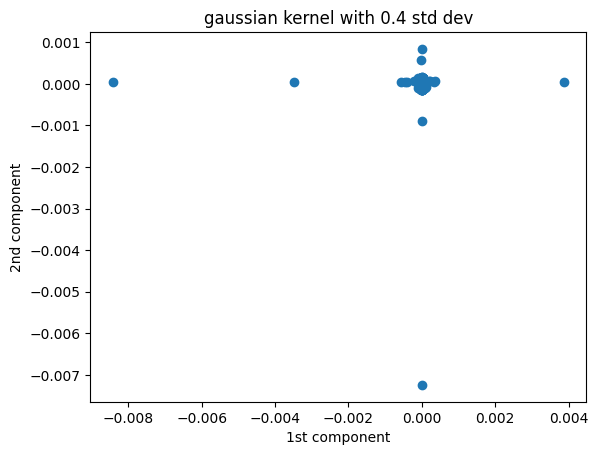

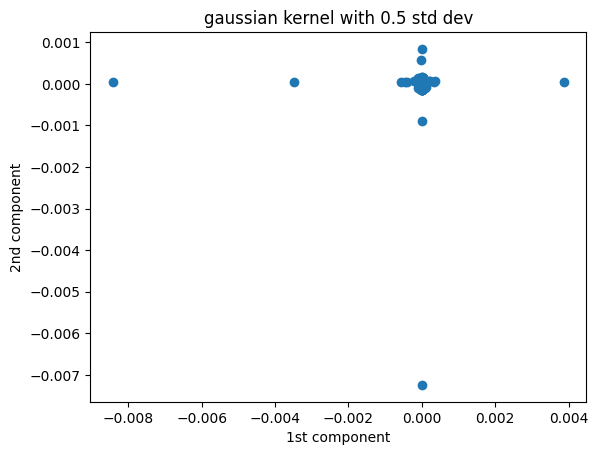

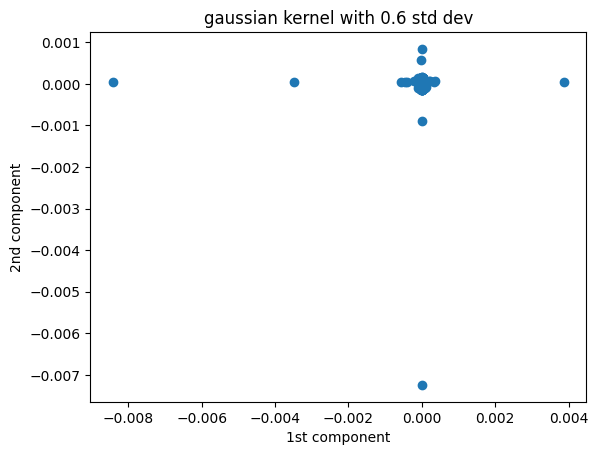

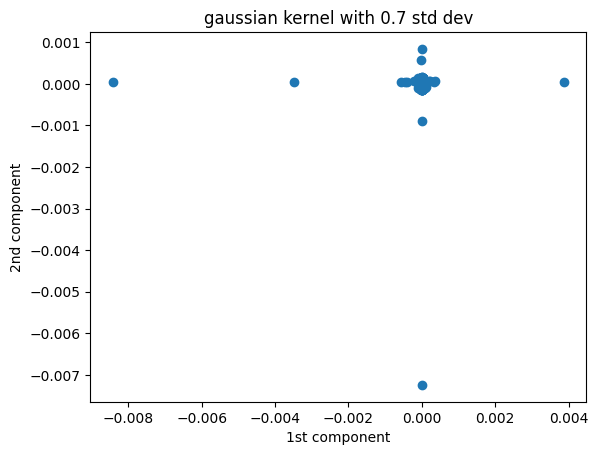

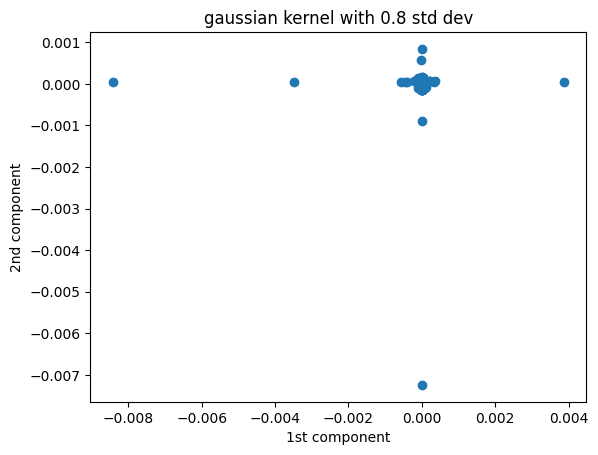

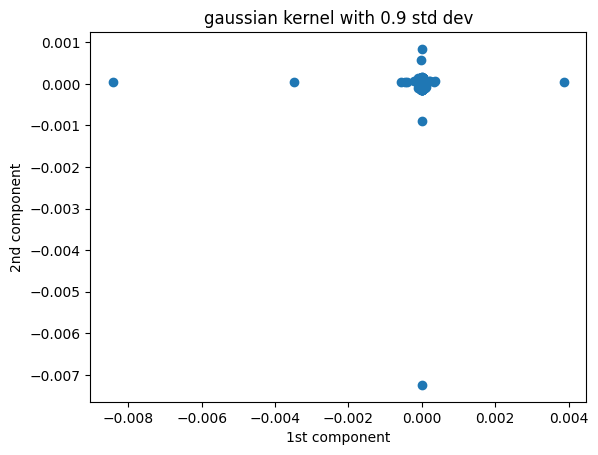

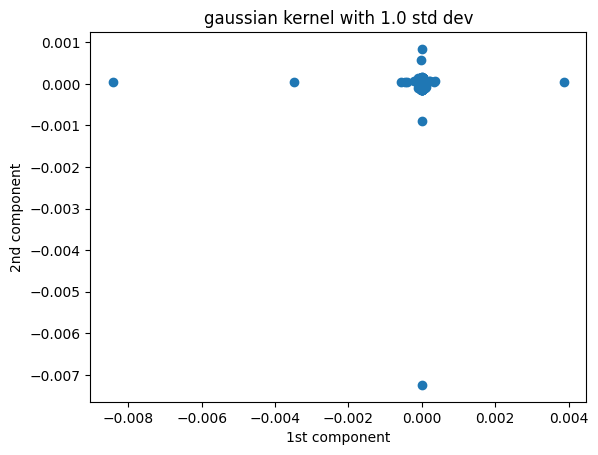

In [ ]:
sigma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for i in sigma:
  kernelpcagaussian(X,i)